# 0.환경설정

In [1]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 폰트 오류 해결 함수
def font_error_solve() :
    import platform
    platform.system()
    if platform.system() == 'Darwin': # Mac 환경 폰트 설정
        plt.rc('font', family='AppleGothic')
    elif platform.system() == 'Windows': # Windows 환경 폰트 설정
        plt.rc('font', family='Malgun Gothic')
    plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [3]:
# 행 개수 조정
pd.set_option('display.max_row', 200)

# 열 개수 조정
pd.set_option('display.max_columns', 200)

# 1.평가 함수 만들기

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, auc
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))

In [5]:
def roc_curve_plot(y_test, pred_proba_c1):
    font_error_solve()
    
    fprs, tprs, thresholds  = roc_curve(y_test, pred_proba_c1)
        
    sns.set_theme(style = 'white')
    plt.figure(figsize = (6, 6))
    
    # ROC곡선을 그래프로 그림
    plt.plot(fprs, tprs, color = '#b01717', label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1], [0,1], 'k--', color = '#174ab0', label='Random')
    
    # FPR X축의 Scale을 0.1 단위로 변경, X, Y축 명 설정 등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR(1-Sensitivity)')
    plt.ylabel('TPR(Recall)')
    plt.grid(True)
    plt.legend()

# 2-(1).데이터 불러오기

In [6]:
df1=pd.read_csv('./data/M_data_breed_mix.csv')                  #믹스견
df2=pd.read_csv('./data/M_data_breed_mix_shelter.csv')          #믹스견+보호소
df3=pd.read_csv('./data/M_data_breed_top5.csv')                 #top5
df4=pd.read_csv('./data/M_data_breed_top5_shelter.csv')         #top5+보호소

# 2-(2).데이터 분할

### < df1:믹스견 >

In [7]:
from sklearn.model_selection import train_test_split

x1= df1.drop("status", axis = 1)
y1= df1[["status"]]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, 
                                                        y1,
                                                        test_size = 0.1, random_state = 151)

print(x1_train.shape, x1_test.shape)

(3249, 18) (362, 18)


### < df2:믹스견+보호소 >

In [8]:
x2= df2.drop("status", axis = 1)
y2= df2[["status"]]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, 
                                                        y2,
                                                        test_size = 0.1, random_state = 151)

print(x2_train.shape, x2_test.shape)

(3249, 51) (362, 51)


### < df3:top5 >

In [9]:
x3= df3.drop("status", axis = 1)
y3= df3[["status"]]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, 
                                                        y3,
                                                        test_size = 0.1, random_state = 151)

print(x3_train.shape, x3_test.shape)

(348, 18) (39, 18)


In [10]:
x4= df4.drop("status", axis = 1)
y4= df4[["status"]]

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, 
                                                        y4,
                                                        test_size = 0.1, random_state = 151)

print(x4_train.shape, x4_test.shape)

(348, 47) (39, 47)


# 3.머신러닝

### 분류 기법
로지스틱 회귀    
KNN          
나이즈베이지안       
서포트벡터머신     
GBM   

RandomForest      
LightGBM         
XGBOOST        


## 3-(1)Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

### < df1:믹스견 >

- 모델링

In [12]:
rf1 = RandomForestClassifier(n_estimators = 80, max_depth = 3, 
                             min_samples_leaf = 2, min_samples_split = 2,
                             random_state=21)
rf1.fit(x1_train,y1_train.values.ravel())

rf1_preds = rf1.predict(x1_test)
rf1_pred_proba = rf1.predict_proba(x1_test)[:,1]

- 평가

In [13]:
get_clf_eval(y1_test, rf1_preds, rf1_pred_proba)

오차행렬
[[238   2]
 [115   7]]
정확도: 0.6768, 정밀도: 0.7778, 재현율: 0.0574, F1: 0.1069, AUC:0.5245


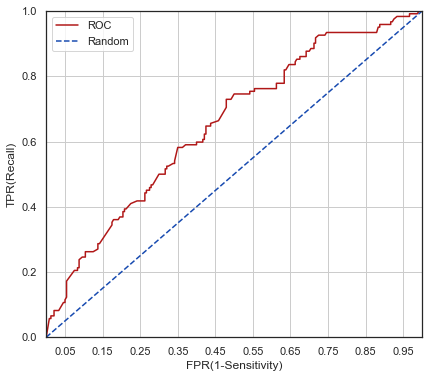

In [14]:
roc_curve_plot(y1_test, rf1_pred_proba)

- 피처 중요도 시각화

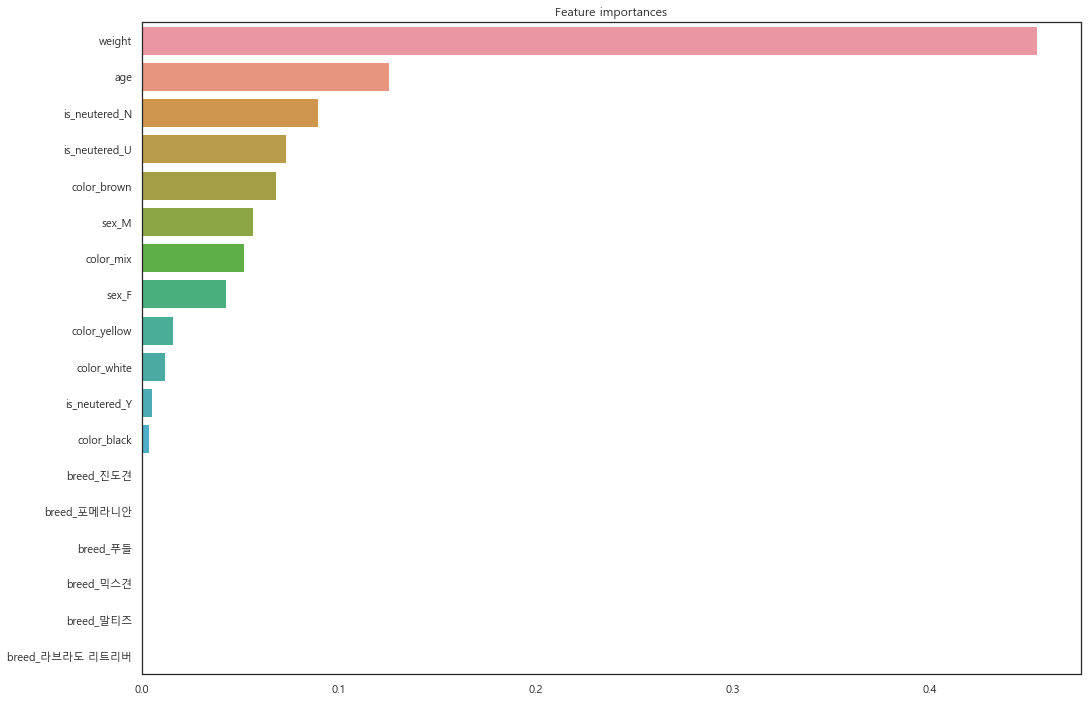

In [15]:
font_error_solve()

importances_values = rf1.feature_importances_
importances = pd.Series(importances_values, index=x1_train.columns)
fi = importances.sort_values(ascending=False)
plt.figure(figsize=(15, 12))
plt.title('Feature importances')
sns.barplot(x = fi, y = fi.index)
plt.show()

### < df2:믹스견+보호소 >

- 모델링

In [16]:
rf2 = RandomForestClassifier(n_estimators = 80, max_depth = 3, 
                             min_samples_leaf = 2, min_samples_split = 2,
                             random_state=21)
rf2.fit(x2_train,y2_train.values.ravel())

rf2_preds = rf2.predict(x2_test)
rf2_pred_proba = rf2.predict_proba(x2_test)[:,1]

- 평가

In [17]:
get_clf_eval(y2_test, rf2_preds, rf2_pred_proba)

오차행렬
[[239   1]
 [113   9]]
정확도: 0.6851, 정밀도: 0.9000, 재현율: 0.0738, F1: 0.1364, AUC:0.5348


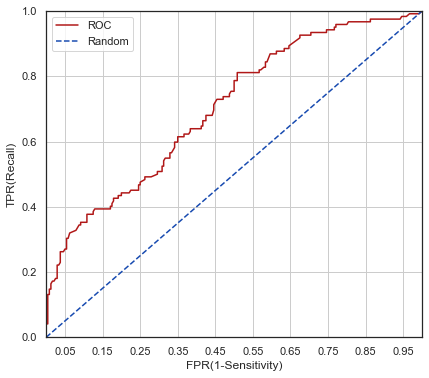

In [18]:
roc_curve_plot(y2_test, rf2_pred_proba)

- 피처 중요도 시각화

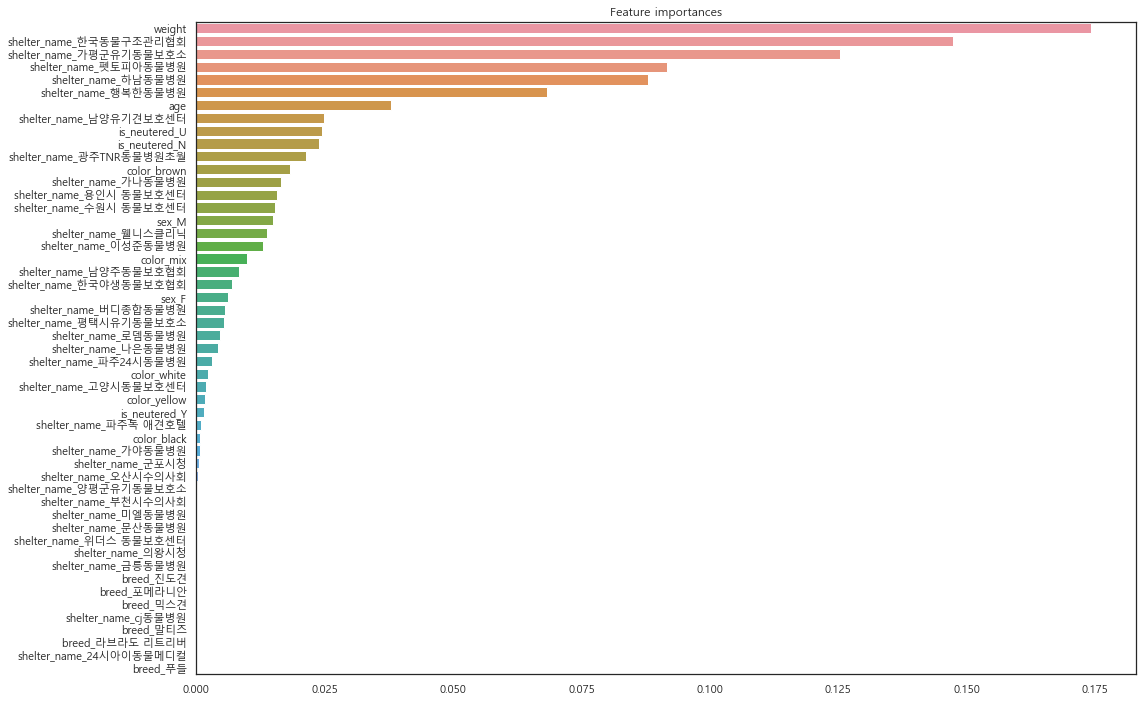

In [19]:
font_error_solve()

importances_values = rf2.feature_importances_
importances = pd.Series(importances_values, index=x2_train.columns)
fi = importances.sort_values(ascending=False)
plt.figure(figsize=(15, 12))
plt.title('Feature importances')
sns.barplot(x = fi, y = fi.index)
plt.show()

### < df3:top5 >

- 모델링

In [20]:
rf3 = RandomForestClassifier(n_estimators = 80, max_depth = 3, 
                             min_samples_leaf = 2, min_samples_split = 2,
                             random_state=21)
rf3.fit(x3_train,y3_train.values.ravel())

rf3_preds = rf3.predict(x3_test)
rf3_pred_proba = rf3.predict_proba(x3_test)[:,1]

- 평가

In [21]:
get_clf_eval(y3_test, rf3_preds, rf3_pred_proba)

오차행렬
[[ 1  4]
 [ 3 31]]
정확도: 0.8205, 정밀도: 0.8857, 재현율: 0.9118, F1: 0.8986, AUC:0.5559


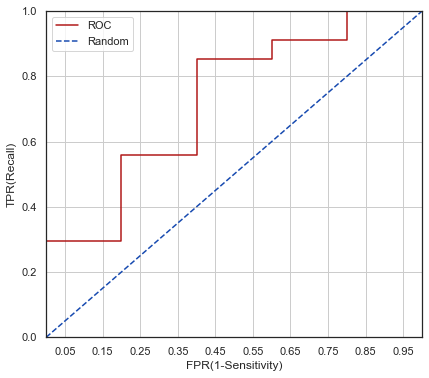

In [22]:
roc_curve_plot(y3_test, rf3_pred_proba)

- 피처 중요도 시각화

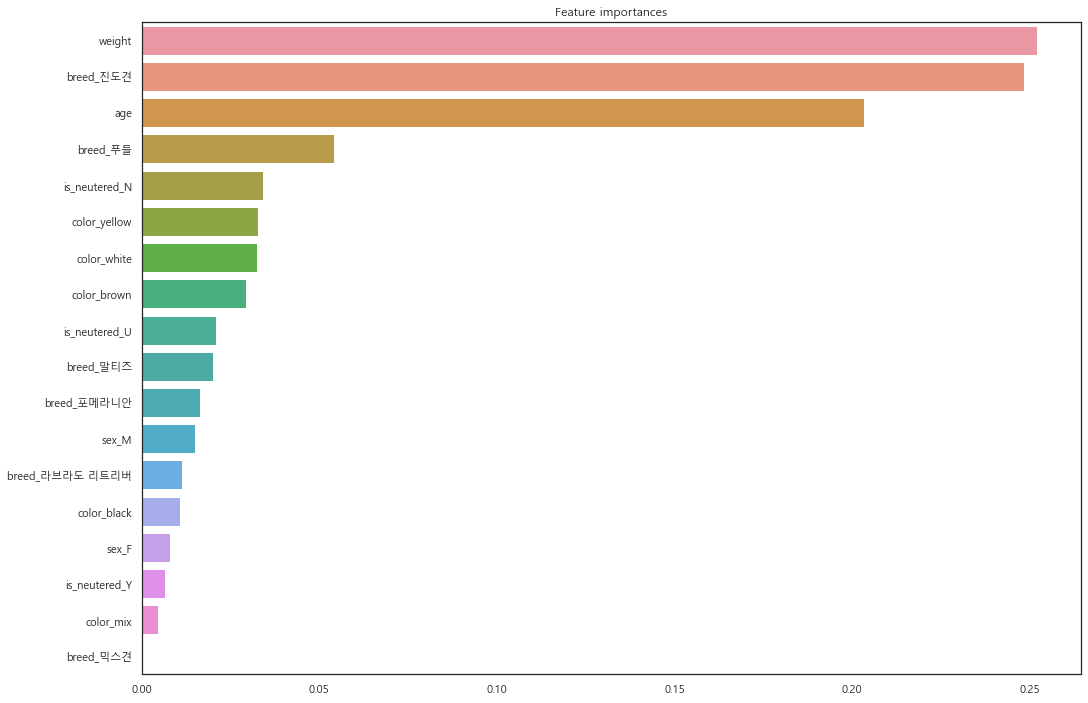

In [23]:
font_error_solve()

importances_values = rf3.feature_importances_
importances = pd.Series(importances_values, index=x3_train.columns)
fi = importances.sort_values(ascending=False)
plt.figure(figsize=(15, 12))
plt.title('Feature importances')
sns.barplot(x = fi, y = fi.index)
plt.show()

### < df4:top5+보호소 >

- 모델링

In [24]:
rf4 = RandomForestClassifier(n_estimators = 80, max_depth = 3, 
                             min_samples_leaf = 2, min_samples_split = 2,
                             random_state=21)
rf4.fit(x4_train,y4_train.values.ravel())

rf4_preds = rf4.predict(x4_test)
rf4_pred_proba = rf4.predict_proba(x4_test)[:,1]

-  평가

In [25]:
get_clf_eval(y4_test, rf4_preds, rf4_pred_proba)

오차행렬
[[ 1  4]
 [ 1 33]]
정확도: 0.8718, 정밀도: 0.8919, 재현율: 0.9706, F1: 0.9296, AUC:0.5853


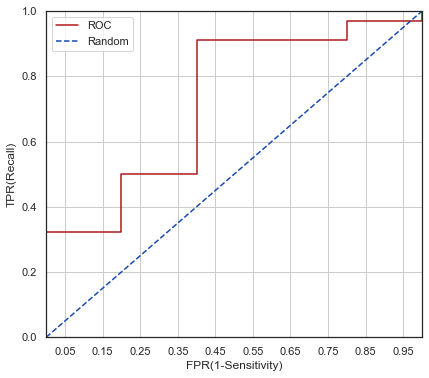

In [26]:
roc_curve_plot(y4_test, rf4_pred_proba)

- 피처 중요도 시각화

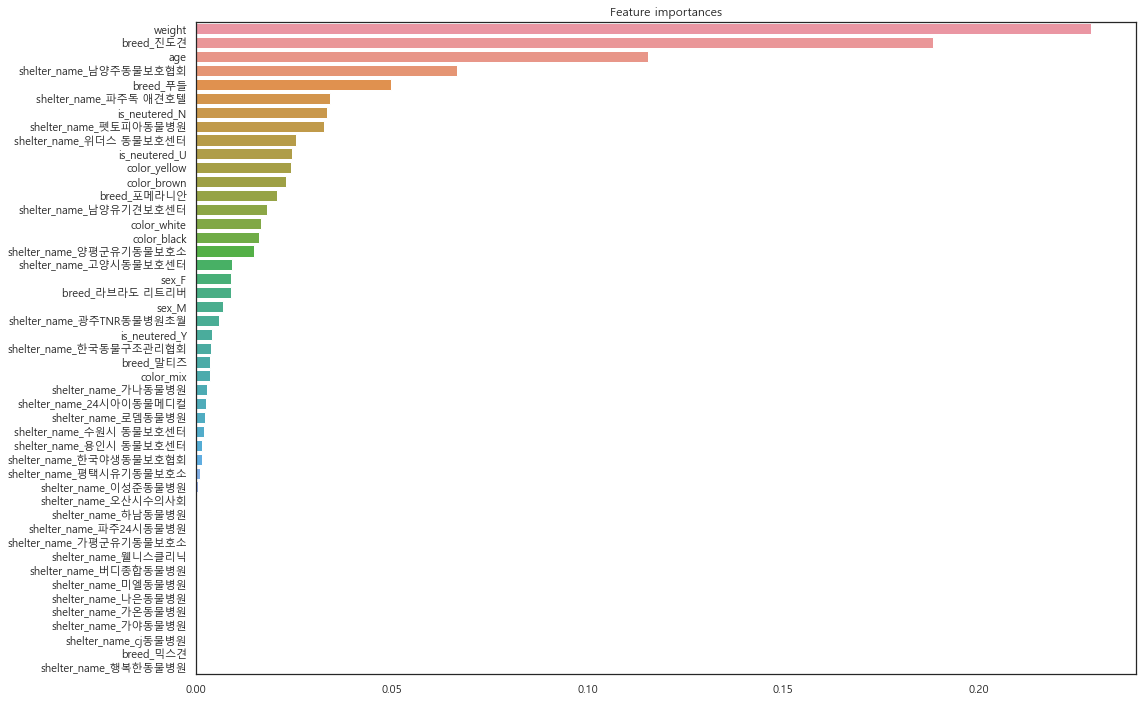

In [27]:
font_error_solve()

importances_values = rf4.feature_importances_
importances = pd.Series(importances_values, index=x4_train.columns)
fi = importances.sort_values(ascending=False)
plt.figure(figsize=(15, 12))
plt.title('Feature importances')
sns.barplot(x = fi, y = fi.index)
plt.show()

## 3-(2)LightGBM

In [28]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
print(lgb.__version__)

3.2.1


### < df1:믹스견 >

- 모델링

In [29]:
lgbm1_wrapper=LGBMClassifier(n_estimators=400)
evals1 = [(x1_test,y1_test)]
lgbm1_wrapper.fit(x1_train, y1_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals1, verbose=True)
lgbm1_preds = lgbm1_wrapper.predict(x1_test)
lgbm1_pred_proba = lgbm1_wrapper.predict_proba(x1_test)[:,1]

[1]	valid_0's binary_logloss: 0.628382
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.619281
[3]	valid_0's binary_logloss: 0.613221
[4]	valid_0's binary_logloss: 0.607644
[5]	valid_0's binary_logloss: 0.603219
[6]	valid_0's binary_logloss: 0.598875
[7]	valid_0's binary_logloss: 0.595886
[8]	valid_0's binary_logloss: 0.594221
[9]	valid_0's binary_logloss: 0.590363
[10]	valid_0's binary_logloss: 0.589039
[11]	valid_0's binary_logloss: 0.58694
[12]	valid_0's binary_logloss: 0.584897
[13]	valid_0's binary_logloss: 0.584126
[14]	valid_0's binary_logloss: 0.584269
[15]	valid_0's binary_logloss: 0.582856
[16]	valid_0's binary_logloss: 0.583597
[17]	valid_0's binary_logloss: 0.583681
[18]	valid_0's binary_logloss: 0.583535
[19]	valid_0's binary_logloss: 0.583937
[20]	valid_0's binary_logloss: 0.585303
[21]	valid_0's binary_logloss: 0.585432
[22]	valid_0's binary_logloss: 0.585071
[23]	valid_0's binary_logloss: 0.585875
[24]	valid_0's binary_loglos

- 평가

In [30]:
get_clf_eval(y1_test, lgbm1_preds, lgbm1_pred_proba)

오차행렬
[[226  14]
 [ 89  33]]
정확도: 0.7155, 정밀도: 0.7021, 재현율: 0.2705, F1: 0.3905, AUC:0.6061


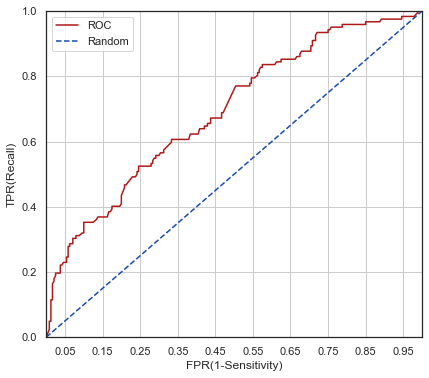

In [31]:
roc_curve_plot(y1_test, lgbm1_pred_proba)

- 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

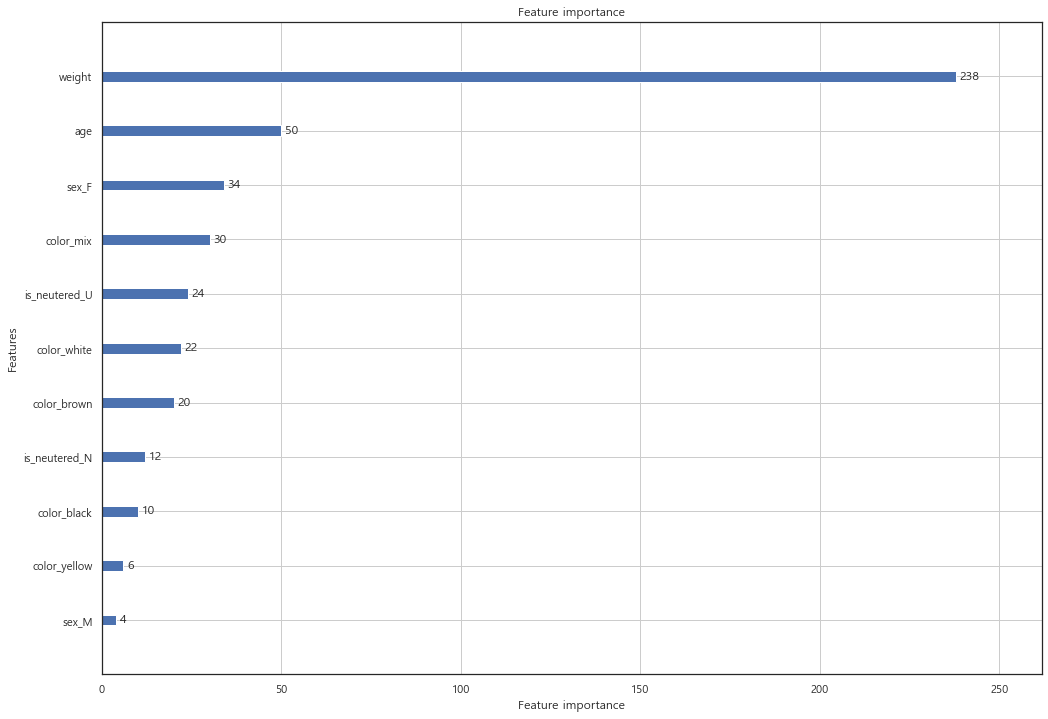

In [32]:
from lightgbm import plot_importance

font_error_solve()

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(lgbm1_wrapper, ax = ax)

### < df2:믹스견 + 보호소>

- 모델링

In [33]:
lgbm2_wrapper=LGBMClassifier(n_estimators=400)
evals2 = [(x2_test,y2_test)]
lgbm2_wrapper.fit(x2_train, y2_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals2, verbose=True)
lgbm2_preds = lgbm2_wrapper.predict(x2_test)
lgbm2_pred_proba = lgbm2_wrapper.predict_proba(x2_test)[:,1]

[1]	valid_0's binary_logloss: 0.620505
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.605469
[3]	valid_0's binary_logloss: 0.591688
[4]	valid_0's binary_logloss: 0.581113
[5]	valid_0's binary_logloss: 0.572992
[6]	valid_0's binary_logloss: 0.566845
[7]	valid_0's binary_logloss: 0.560646
[8]	valid_0's binary_logloss: 0.555499
[9]	valid_0's binary_logloss: 0.552173
[10]	valid_0's binary_logloss: 0.548756
[11]	valid_0's binary_logloss: 0.546197
[12]	valid_0's binary_logloss: 0.542045
[13]	valid_0's binary_logloss: 0.539882
[14]	valid_0's binary_logloss: 0.537544
[15]	valid_0's binary_logloss: 0.536001
[16]	valid_0's binary_logloss: 0.534808
[17]	valid_0's binary_logloss: 0.533075
[18]	valid_0's binary_logloss: 0.530345
[19]	valid_0's binary_logloss: 0.530025
[20]	valid_0's binary_logloss: 0.528053
[21]	valid_0's binary_logloss: 0.526021
[22]	valid_0's binary_logloss: 0.523828
[23]	valid_0's binary_logloss: 0.523156
[24]	valid_0's binary_loglo

- 평가

In [34]:
get_clf_eval(y2_test, lgbm2_preds, lgbm2_pred_proba)

오차행렬
[[221  19]
 [ 72  50]]
정확도: 0.7486, 정밀도: 0.7246, 재현율: 0.4098, F1: 0.5236, AUC:0.6653


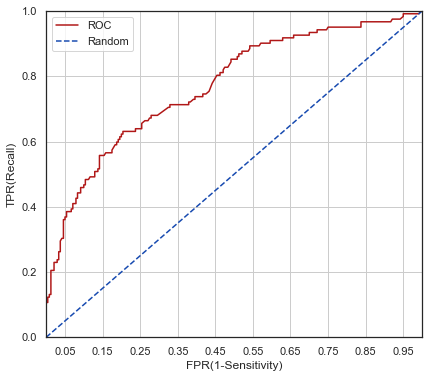

In [35]:
roc_curve_plot(y2_test, lgbm2_pred_proba)

- 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

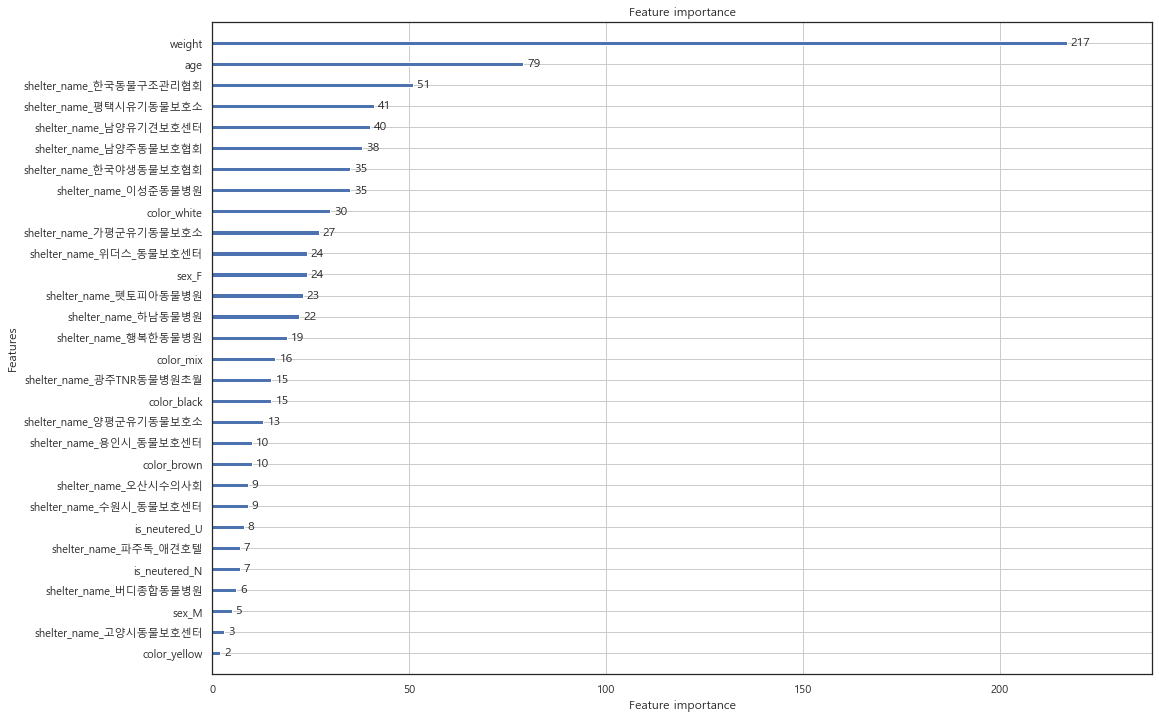

In [36]:
from lightgbm import plot_importance

font_error_solve()

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(lgbm2_wrapper, ax = ax)

#### < df3:top5>

- 모델링

In [37]:
lgbm3_wrapper=LGBMClassifier(n_estimators=400)
evals3 = [(x3_test,y3_test)]
lgbm3_wrapper.fit(x3_train, y3_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals3, verbose=True)
lgbm3_preds = lgbm3_wrapper.predict(x3_test)
lgbm3_pred_proba = lgbm3_wrapper.predict_proba(x3_test)[:,1]

[1]	valid_0's binary_logloss: 0.418789
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.413896
[3]	valid_0's binary_logloss: 0.412699
[4]	valid_0's binary_logloss: 0.413331
[5]	valid_0's binary_logloss: 0.415241
[6]	valid_0's binary_logloss: 0.416757
[7]	valid_0's binary_logloss: 0.417845
[8]	valid_0's binary_logloss: 0.420169
[9]	valid_0's binary_logloss: 0.423422
[10]	valid_0's binary_logloss: 0.425382
[11]	valid_0's binary_logloss: 0.429016
[12]	valid_0's binary_logloss: 0.433309
[13]	valid_0's binary_logloss: 0.436928
[14]	valid_0's binary_logloss: 0.438301
[15]	valid_0's binary_logloss: 0.44035
[16]	valid_0's binary_logloss: 0.44242
[17]	valid_0's binary_logloss: 0.443997
[18]	valid_0's binary_logloss: 0.446499
[19]	valid_0's binary_logloss: 0.446843
[20]	valid_0's binary_logloss: 0.448665
[21]	valid_0's binary_logloss: 0.45092
[22]	valid_0's binary_logloss: 0.453989
[23]	valid_0's binary_logloss: 0.457268
[24]	valid_0's binary_logloss:

- 평가

In [38]:
get_clf_eval(y3_test, lgbm3_preds, lgbm3_pred_proba)

오차행렬
[[ 0  5]
 [ 0 34]]
정확도: 0.8718, 정밀도: 0.8718, 재현율: 1.0000, F1: 0.9315, AUC:0.5000


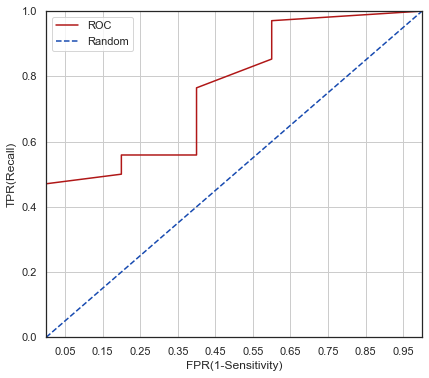

In [39]:
roc_curve_plot(y3_test, lgbm3_pred_proba)

- 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

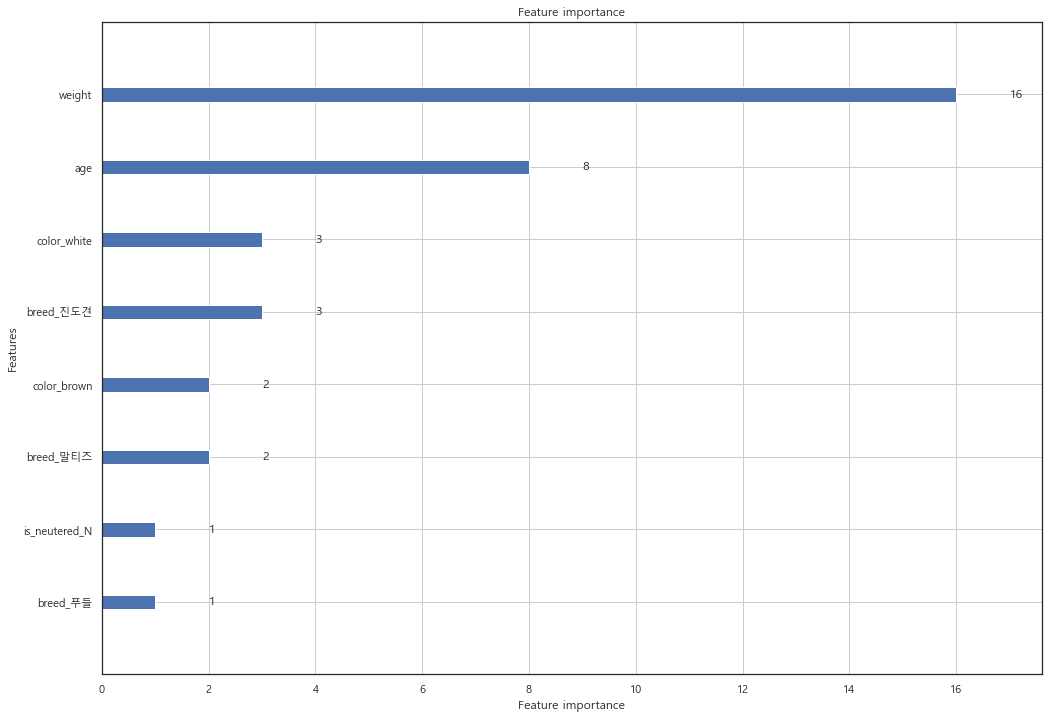

In [40]:
from lightgbm import plot_importance

font_error_solve()

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(lgbm3_wrapper, ax = ax)

### < df4:top5+보호소 >

- 모델링

In [41]:
lgbm4_wrapper=LGBMClassifier(n_estimators=400)
evals4 = [(x4_test,y4_test)]
lgbm4_wrapper.fit(x4_train, y4_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals4, verbose=True)
lgbm4_preds = lgbm4_wrapper.predict(x4_test)
lgbm4_pred_proba = lgbm4_wrapper.predict_proba(x4_test)[:,1]

[1]	valid_0's binary_logloss: 0.418789
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.413896
[3]	valid_0's binary_logloss: 0.412699
[4]	valid_0's binary_logloss: 0.413331
[5]	valid_0's binary_logloss: 0.415241
[6]	valid_0's binary_logloss: 0.416757
[7]	valid_0's binary_logloss: 0.421778
[8]	valid_0's binary_logloss: 0.428302
[9]	valid_0's binary_logloss: 0.42979
[10]	valid_0's binary_logloss: 0.433882
[11]	valid_0's binary_logloss: 0.438529
[12]	valid_0's binary_logloss: 0.441948
[13]	valid_0's binary_logloss: 0.448051
[14]	valid_0's binary_logloss: 0.45035
[15]	valid_0's binary_logloss: 0.454161
[16]	valid_0's binary_logloss: 0.457431
[17]	valid_0's binary_logloss: 0.46075
[18]	valid_0's binary_logloss: 0.464004
[19]	valid_0's binary_logloss: 0.463356
[20]	valid_0's binary_logloss: 0.469187
[21]	valid_0's binary_logloss: 0.469731
[22]	valid_0's binary_logloss: 0.47734
[23]	valid_0's binary_logloss: 0.48354
[24]	valid_0's binary_logloss: 0

- 평가

In [42]:
get_clf_eval(y4_test, lgbm4_preds, lgbm4_pred_proba)

오차행렬
[[ 0  5]
 [ 0 34]]
정확도: 0.8718, 정밀도: 0.8718, 재현율: 1.0000, F1: 0.9315, AUC:0.5000


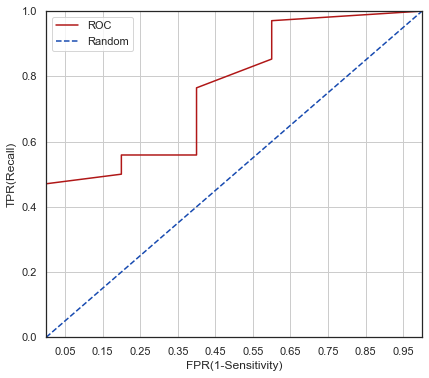

In [43]:
roc_curve_plot(y4_test, lgbm4_pred_proba)

- 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

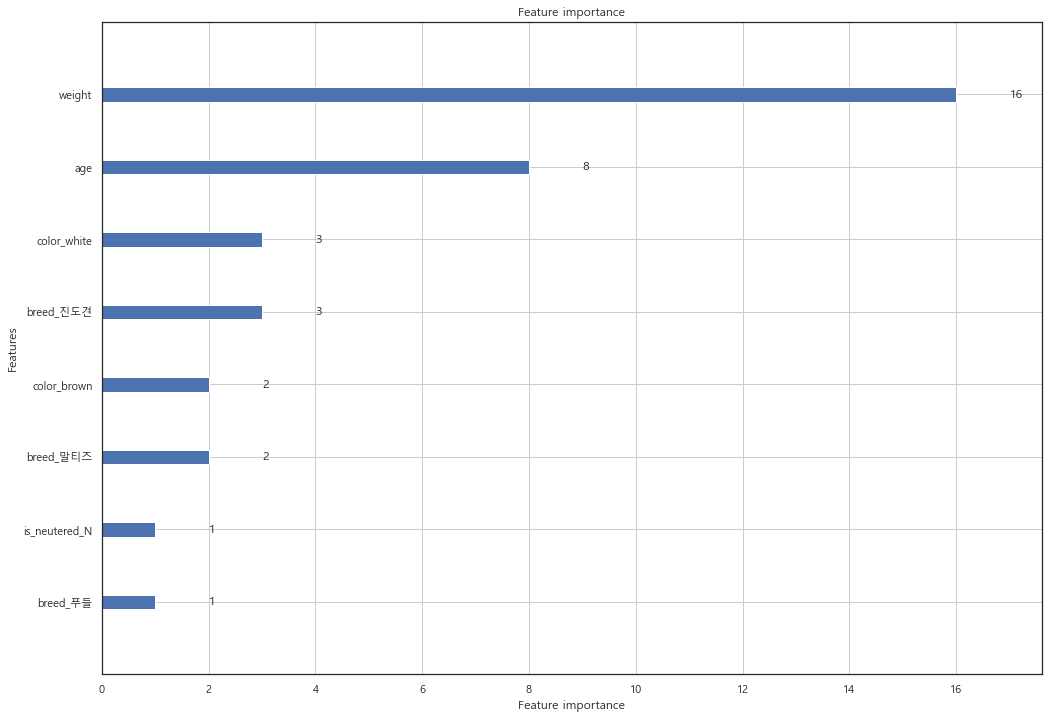

In [44]:
from lightgbm import plot_importance

font_error_solve()

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(lgbm4_wrapper, ax = ax)

## 3-(3)XGBoost

In [45]:
import xgboost as xgb
from xgboost import XGBClassifier
print(xgb.__version__)

1.3.3


### < df1:믹스견 >

- 모델링

In [46]:
xgb1_wrapper = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3, 
                            objective = "binary:logistic", eval_metric = "error")
xgb1_wrapper.fit(x1_train, y1_train)
xgb1_preds = xgb1_wrapper.predict(x1_test)
xgb1_pred_proba = xgb1_wrapper.predict_proba(x1_test)[:,1]

- 평가

In [47]:
get_clf_eval(y1_test, xgb1_preds, xgb1_pred_proba)

오차행렬
[[207  33]
 [ 72  50]]
정확도: 0.7099, 정밀도: 0.6024, 재현율: 0.4098, F1: 0.4878, AUC:0.6362


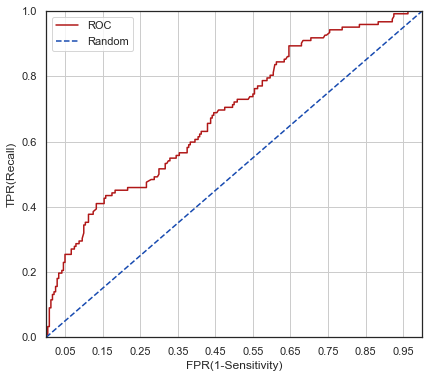

In [48]:
roc_curve_plot(y1_test, xgb1_pred_proba)

- 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

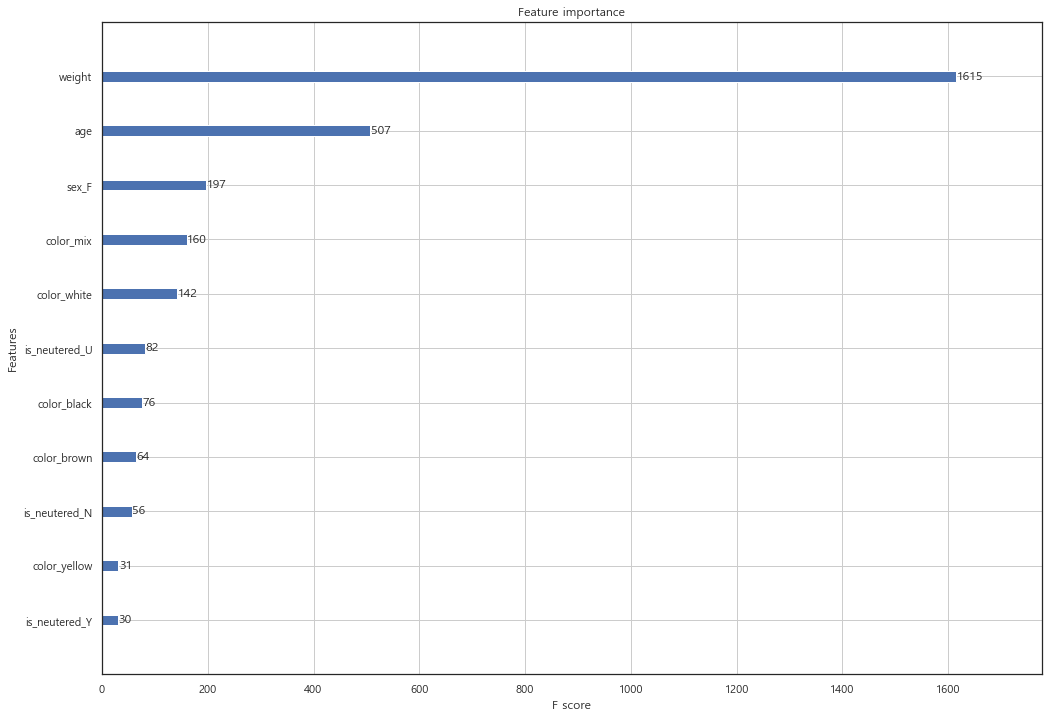

In [49]:
from xgboost import plot_importance

font_error_solve()

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(xgb1_wrapper, ax = ax)

### < df2 : 믹스견 + 보호소 >

- 모델링

In [50]:
from xgboost import XGBClassifier

xgb2_wrapper = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3, 
                            objective = "binary:logistic", eval_metric = "error")
xgb2_wrapper.fit(x2_train, y2_train)
xgb2_preds = xgb2_wrapper.predict(x2_test)
xgb2_pred_proba = xgb2_wrapper.predict_proba(x2_test)[:,1]

- 평가

In [51]:
get_clf_eval(y2_test, xgb2_preds, xgb2_pred_proba)

오차행렬
[[217  23]
 [ 64  58]]
정확도: 0.7597, 정밀도: 0.7160, 재현율: 0.4754, F1: 0.5714, AUC:0.6898


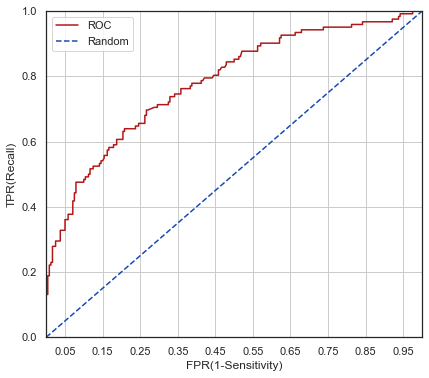

In [52]:
roc_curve_plot(y2_test, xgb2_pred_proba)

- 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

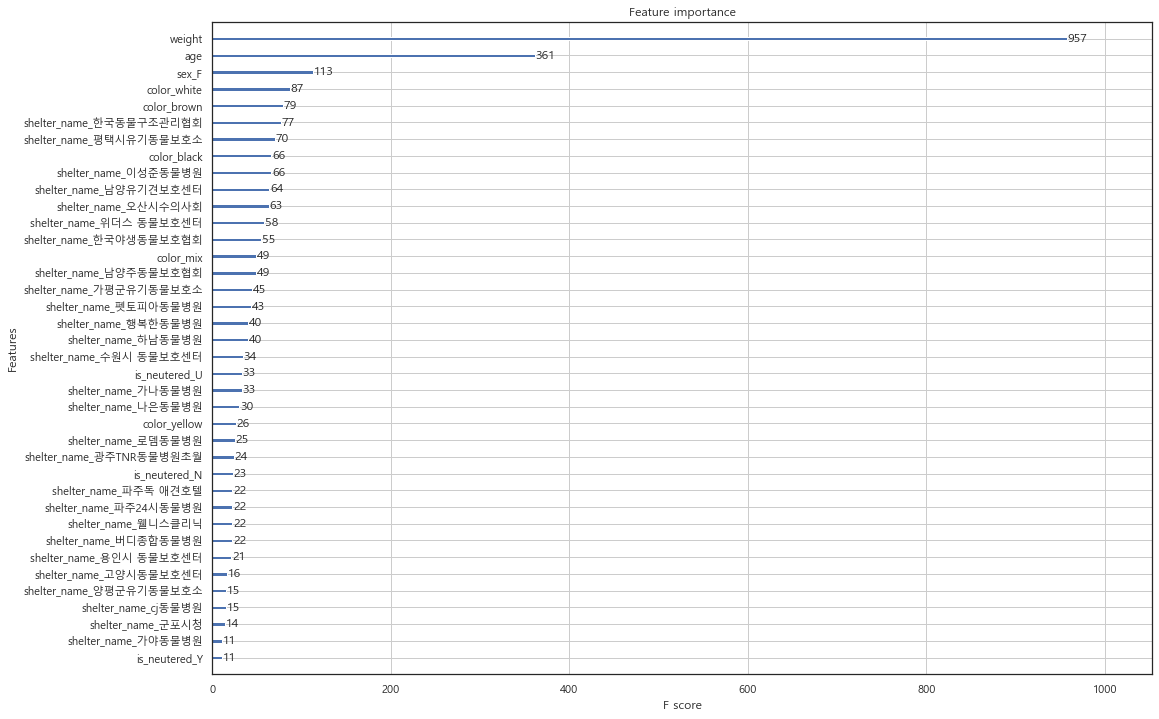

In [53]:
from xgboost import plot_importance

font_error_solve()

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(xgb2_wrapper, ax = ax)

### < df3:top5 품종 >

- 모델링

In [54]:
from xgboost import XGBClassifier

xgb3_wrapper = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3, 
                            objective = "binary:logistic", eval_metric = "error")
xgb3_wrapper.fit(x3_train, y3_train)
xgb3_preds = xgb3_wrapper.predict(x3_test)
xgb3_pred_proba = xgb3_wrapper.predict_proba(x3_test)[:,1]

- 평가

In [55]:
get_clf_eval(y3_test, xgb3_preds, xgb3_pred_proba)

오차행렬
[[ 4  1]
 [ 9 25]]
정확도: 0.7436, 정밀도: 0.9615, 재현율: 0.7353, F1: 0.8333, AUC:0.7676


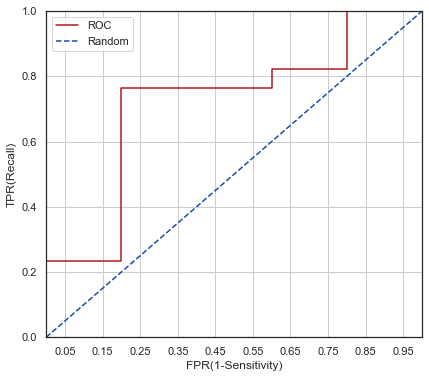

In [56]:
roc_curve_plot(y3_test, xgb3_pred_proba)

- 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

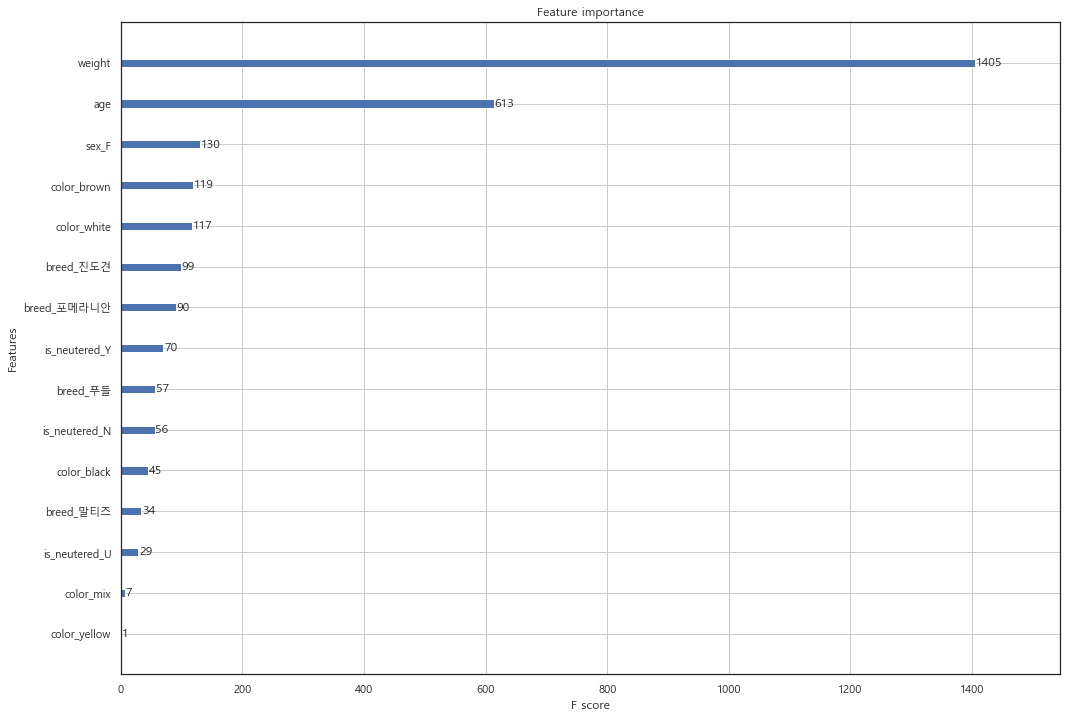

In [57]:
from xgboost import plot_importance

font_error_solve()

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(xgb3_wrapper, ax = ax)

###  < df4 : 품종 + 보호소 >

- 모델링

In [58]:
from xgboost import XGBClassifier

xgb4_wrapper = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 3, 
                            objective = "binary:logistic", eval_metric = "error")
xgb4_wrapper.fit(x4_train, y4_train)
xgb4_preds = xgb4_wrapper.predict(x4_test)
xgb4_pred_proba = xgb4_wrapper.predict_proba(x4_test)[:,1]

- 평가

In [59]:
get_clf_eval(y4_test, xgb4_preds, xgb4_pred_proba)

오차행렬
[[ 3  2]
 [ 9 25]]
정확도: 0.7179, 정밀도: 0.9259, 재현율: 0.7353, F1: 0.8197, AUC:0.6676


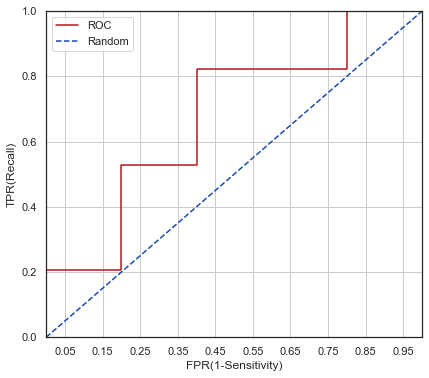

In [60]:
roc_curve_plot(y4_test, xgb4_pred_proba)

- 피처 중요도 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

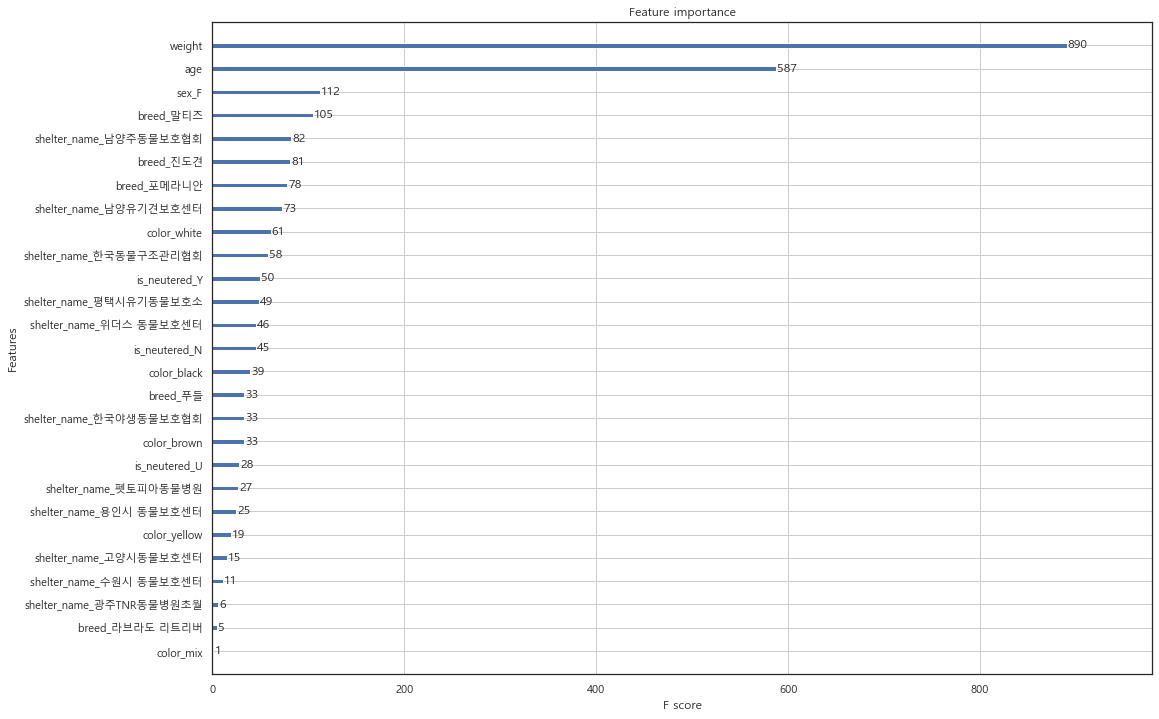

In [61]:
from xgboost import plot_importance

font_error_solve()

fig, ax = plt.subplots(figsize = (15, 12))
plot_importance(xgb4_wrapper, ax = ax)

## 3-(4)앙상블

In [62]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

### 앙상블 함수 만들기

- soft_voting

In [63]:
def ensemble_soft_voting(data, target):
    #개별 모델은 Logistic Regression, KNN, Support Vector Machine, Gradient Boost Machine, GaussianNB.
    lr_clf = LogisticRegression()
    knn_clf = KNeighborsClassifier(n_neighbors=8)
    svm_clf = SVC(kernel='linear', C=1.0, random_state=0, probability=True)
    gb_clf = GradientBoostingClassifier(random_state=0)
    nb_clif = GaussianNB()

    #개별 모델을 소프트 보티 기반의 앙상블 모델로 구현한 분류기
    vo_clf = VotingClassifier(estimators=[('LogisticRegression', lr_clf), 
                                          ('KNN', knn_clf), 
                                          ('SVC', svm_clf), 
                                          ('GBM',gb_clf), 
                                          ('GaussianNB', nb_clif)] ,voting='soft')

    x_train, x_test, y_train, y_test = train_test_split(data,
                                                        target,
                                                        test_size = 0.1, random_state = 151)

    #VotingClassifier 학습/예측/평가
    vo_clf.fit(x_train, y_train)
    pred = vo_clf.predict(x_test)
    print("<앙상블 Soft Voting>")
    print("------------------------------------------")
    print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(pred, y_test)))
    print("------------------------------------------")

    #개별 모델의 학습/예측/평가
    classifiers = [lr_clf, knn_clf, gb_clf, nb_clif, svm_clf]
    for classifier in classifiers:
               classifier.fit(x_train, y_train)
               pred = classifier.predict(x_test)
               class_name = classifier.__class__.__name__
               print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(pred, y_test)))
    
    print("------------------------------------------")

- hard_voting

In [64]:
def ensemble_hard_voting(data, target):
    #개별 모델은 Logistic Regression, KNN, Support Vector Machine, Gradient Boost Machine, GaussianNB.
    lr_clf = LogisticRegression()
    knn_clf = KNeighborsClassifier(n_neighbors=8)
    svm_clf = SVC(kernel='linear', C=1.0, random_state=0, probability=True)
    gb_clf = GradientBoostingClassifier(random_state=0)
    nb_clif = GaussianNB()

    #개별 모델을 소프트 보티 기반의 앙상블 모델로 구현한 분류기
    vo_clf = VotingClassifier(estimators=[('LogisticRegression', lr_clf), 
                                          ('KNN', knn_clf), 
                                          ('SVC', svm_clf), 
                                          ('GBM',gb_clf), 
                                          ('GaussianNB', nb_clif)])

    x_train, x_test, y_train, y_test = train_test_split(data,
                                                        target,
                                                        test_size = 0.1, random_state = 151)

    #VotingClassifier 학습/예측/평가
    vo_clf.fit(x_train, y_train)
    pred = vo_clf.predict(x_test)
    print("<앙상블 Hard Voting>")
    print("------------------------------------------")
    print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(pred, y_test)))
    print("------------------------------------------")
    
    #개별 모델의 학습/예측/평가
    classifiers = [lr_clf, knn_clf, gb_clf, nb_clif, svm_clf]
    for classifier in classifiers:
               classifier.fit(x_train, y_train)
               pred = classifier.predict(x_test)
               class_name = classifier.__class__.__name__
               print('{0} 정확도 : {1:.4f}'.format(class_name, accuracy_score(pred, y_test)))
               
    print("------------------------------------------")

### < df1:믹스견 >

In [65]:
ensemble_soft_voting(x1,y1)

<앙상블 Soft Voting>
------------------------------------------
Voting 분류기 정확도 : 0.6713
------------------------------------------
LogisticRegression 정확도 : 0.6823
KNeighborsClassifier 정확도 : 0.6796
GradientBoostingClassifier 정확도 : 0.6961
GaussianNB 정확도 : 0.5939
SVC 정확도 : 0.6630
------------------------------------------


In [66]:
ensemble_hard_voting(x1,y1)

<앙상블 Hard Voting>
------------------------------------------
Voting 분류기 정확도 : 0.6961
------------------------------------------
LogisticRegression 정확도 : 0.6823
KNeighborsClassifier 정확도 : 0.6796
GradientBoostingClassifier 정확도 : 0.6961
GaussianNB 정확도 : 0.5939
SVC 정확도 : 0.6630
------------------------------------------


### < df2 : 믹스견 + 보호소 >

In [67]:
ensemble_soft_voting(x2,y2)

<앙상블 Soft Voting>
------------------------------------------
Voting 분류기 정확도 : 0.7182
------------------------------------------
LogisticRegression 정확도 : 0.7099
KNeighborsClassifier 정확도 : 0.7238
GradientBoostingClassifier 정확도 : 0.7210
GaussianNB 정확도 : 0.7210
SVC 정확도 : 0.7044
------------------------------------------


In [68]:
ensemble_hard_voting(x2,y2)

<앙상블 Hard Voting>
------------------------------------------
Voting 분류기 정확도 : 0.7155
------------------------------------------
LogisticRegression 정확도 : 0.7099
KNeighborsClassifier 정확도 : 0.7238
GradientBoostingClassifier 정확도 : 0.7210
GaussianNB 정확도 : 0.7210
SVC 정확도 : 0.7044
------------------------------------------


### < df3 : top5 품종 >

In [69]:
ensemble_soft_voting(x3,y3)

<앙상블 Soft Voting>
------------------------------------------
Voting 분류기 정확도 : 0.7436
------------------------------------------
LogisticRegression 정확도 : 0.7436
KNeighborsClassifier 정확도 : 0.6923
GradientBoostingClassifier 정확도 : 0.7179
GaussianNB 정확도 : 0.6923
SVC 정확도 : 0.7949
------------------------------------------


In [70]:
ensemble_hard_voting(x3,y3)

<앙상블 Hard Voting>
------------------------------------------
Voting 분류기 정확도 : 0.7436
------------------------------------------
LogisticRegression 정확도 : 0.7436
KNeighborsClassifier 정확도 : 0.6923
GradientBoostingClassifier 정확도 : 0.7179
GaussianNB 정확도 : 0.6923
SVC 정확도 : 0.7949
------------------------------------------


###  < df4 : 품종 + 보호소 >

In [71]:
ensemble_soft_voting(x4,y4)

<앙상블 Soft Voting>
------------------------------------------
Voting 분류기 정확도 : 0.6667
------------------------------------------
LogisticRegression 정확도 : 0.7436
KNeighborsClassifier 정확도 : 0.6410
GradientBoostingClassifier 정확도 : 0.7179
GaussianNB 정확도 : 0.3077
SVC 정확도 : 0.7436
------------------------------------------


In [72]:
ensemble_hard_voting(x4,y4)

<앙상블 Hard Voting>
------------------------------------------
Voting 분류기 정확도 : 0.7179
------------------------------------------
LogisticRegression 정확도 : 0.7436
KNeighborsClassifier 정확도 : 0.6410
GradientBoostingClassifier 정확도 : 0.7179
GaussianNB 정확도 : 0.3077
SVC 정확도 : 0.7436
------------------------------------------
